# PREPOCESAMIENTO Y CALIDA DE DATOS

# OBJETIVO 

Con esta activida se plantea buscar las personas que son mas vulnerables en un accidente de trafico segun el genero femenino/maculino

He necontrado un data set llamado "victims" que recoge las personas que han sufrido un accidente en California, que trae tambien consigo informacion relevante para nuestro estudio.


Las tareas realizadas sobre el data set son:
- Limpiar el dataset y tratar los valores "NaN"
- Buscar datos perdidos
- Balanceo de datos 
- Analizar los datos analiticamente y con graficas
- Buscar un algoritmo para predecir la poblacion.


# IMPORTAMOS LAS LIBRERIAS NECESARIAS

#LIBRERIAS

In [ ]:
# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns

# DATA SET
El dataset encontrado esta en formato sqlite. Asi que hay que sacar la base de datos que queremos de el, en nuestro caso "victims"

https://www.kaggle.com/alexgude/california-traffic-collision-data-from-switrs

In [ ]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [ ]:
def upload_files_xls ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_excel(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [ ]:
df1 = upload_files_xls()
df1.head()

Saving LFB Incident data from January 2009 to December 2012.xlsx to LFB Incident data from January 2009 to December 2012.xlsx
User uploaded file "LFB Incident data from January 2009 to December 2012.xlsx" with length 78693916 bytes


UnicodeDecodeError: ignored

In [ ]:
df2 = upload_files_xls()
df2.head()

In [ ]:
df3 = upload_files_xls()
df3.head()

In [ ]:
#Unir las 3 bases de datos
frames = [df1, df2, df3]

df_excel = pd.concat(frames)

In [ ]:
#Pasar a CSV
df_excel.to_csv('LFB incident 2009-2021.csv', index=False)

In [ ]:
#Exportar CSV

from google.colab import files

with open('LFB incident 2009-2021.csv', 'w') as f:
  df.to_csv(f,  index = False)
  

files.download('LFB incident 2009-2021.csv')

df.head()

In [ ]:
df=pd.read_csv("LFB incident 2009-2021.csv")
df

FileNotFoundError: ignored

# UNZIP

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

KeyboardInterrupt: ignored

In [ ]:
!unrar x  '/gdrive/My Drive/TFM-Roberto_Hernandez/LFB_incident_2009-2021.rar'  "/gdrive/My Drive/TFM-Roberto_Hernandez/"



UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /gdrive/My Drive/TFM-Roberto_Hernandez/LFB_incident_2009-2021.rar


Would you like to replace the existing file /gdrive/My Drive/TFM-Roberto_Hernandez/LFB incident 2009-2021.csv
404264164 bytes, modified on 2021-05-23 12:27
with a new one
404264164 bytes, modified on 2021-05-23 12:27

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break


'LFB incident 2009-2021.csv'

#CARGAR DESDE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
df = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/LFB incident 2009-2021.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,26,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,UPRN,USRN,Latitude,Longitude,PumpCount,PumpHoursRoundUp,Notional Cost (£)
0,235138081,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,E09000032,WANDSWORTH,Wandsworth,E05000620,Queenstown,Queenstown,528652.0,176830.0,528650,176850,London,Battersea,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1091,2009-01-01,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,Open land/water - nearest gazetteer location,SE1 7SG,SE1,E09000022,LAMBETH,Lambeth,E05000416,Bishop's,Bishop's,530485.0,179007.0,530450,179050,London,Lambeth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2091,2009-01-01,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,E09000010,ENFIELD,Enfield,E05000201,Haselbury,Haselbury,533773.0,194492.0,533750,194450,London,Edmonton,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3091,2009-01-01,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,E09000017,HILLINGDON,Hillingdon,E05000332,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,London,Hillingdon,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5091,2009-01-01,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,E09000019,ISLINGTON,Islington,E05000375,Holloway,Holloway,531058.0,185307.0,531050,185350,London,Holloway,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
#Vemos la aparte de abajo de nuestro dataset
df.tail()


NameError: ignored

In [ ]:
# tamno del dataset
df.shape

In [ ]:
# Informacion asociada al dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333070 entries, 0 to 1333069
Data columns (total 38 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   IncidentNumber                          1333070 non-null  object 
 1   DateOfCall                              1333070 non-null  object 
 2   CalYear                                 1333070 non-null  int64  
 3   TimeOfCall                              1333070 non-null  object 
 4   HourOfCall                              1333070 non-null  int64  
 5   IncidentGroup                           1333069 non-null  object 
 6   StopCodeDescription                     1333069 non-null  object 
 7   SpecialServiceType                      408181 non-null   object 
 8   PropertyCategory                        1333069 non-null  object 
 9   PropertyType                            1333069 non-null  object 
 10  AddressQualifier              

In [ ]:
df

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,FRS,IncidentStationGround,UPRN,USRN,Latitude,Longitude
0,770047,0,2009,37,0,2,8,8,39,1,78520,290,32,32,32,541,956,956,528652.0,176830.0,528650,176850,0,4,NaN,NaN,NaN,NaN
1,0,0,2009,46,0,2,8,5,116,8,63361,238,22,22,21,354,129,128,530485.0,179007.0,530450,179050,0,51,NaN,NaN,NaN,NaN
2,16,0,2009,180,0,1,7,5,224,2,49564,196,10,10,9,176,629,628,533773.0,194492.0,533750,194450,0,23,NaN,NaN,NaN,NaN
3,34,0,2009,267,0,1,7,5,69,6,94384,346,17,17,16,288,653,652,507738.0,182805.0,507750,182850,0,41,NaN,NaN,NaN,NaN
4,68,0,2009,339,0,1,7,5,61,2,48449,194,19,19,18,331,660,659,531058.0,185307.0,531050,185350,0,42,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333065,953934,4502,2021,78112,21,2,8,2,209,10,-1,205,7,6,5,119,1074,1074,NaN,NaN,525650,184050,0,96,0.000000e+00,20400412.0,NaN,NaN
1333066,953334,4502,2021,58807,16,1,7,6,239,0,74344,265,23,23,22,381,407,406,536272.0,178387.0,536250,178350,0,17,1.002533e+10,22004367.0,51.488022,-0.038628
1333067,954158,4502,2021,85985,23,1,7,6,239,5,12543,56,31,31,31,524,720,719,537667.0,187977.0,537650,187950,0,54,1.000236e+11,22832450.0,51.573868,-0.014799
1333068,953318,4502,2021,58468,16,1,7,6,53,1,65106,242,11,11,10,197,513,512,537885.0,176420.0,537850,176450,0,32,1.000210e+11,20801074.0,51.469960,-0.016181


In [ ]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

IncidentGroup                                   1
StopCodeDescription                             1
SpecialServiceType                         924889
PropertyCategory                                1
PropertyType                                    1
Postcode_full                              629843
Easting_m                                  629843
Northing_m                                 629843
FirstPumpArriving_AttendanceTime           234730
FirstPumpArriving_DeployedFromStation      234740
SecondPumpArriving_AttendanceTime         1162974
SecondPumpArriving_DeployedFromStation    1162978
NumStationsWithPumpsAttending                7686
NumPumpsAttending                            7686
UPRN                                       889041
USRN                                       889041
Latitude                                  1116267
Longitude                                 1116267
PumpCount                                  891065
PumpHoursRoundUp                           891205


In [ ]:
# Buscamos valores perdidos
df.isna().sum()


IncidentNumber                                  0
DateOfCall                                      0
CalYear                                         0
TimeOfCall                                      0
HourOfCall                                      0
IncidentGroup                                   1
StopCodeDescription                             1
SpecialServiceType                         924889
PropertyCategory                                1
PropertyType                                    1
AddressQualifier                                0
Postcode_full                              629843
Postcode_district                               0
IncGeo_BoroughCode                              0
IncGeo_BoroughName                              0
ProperCase                                      0
IncGeo_WardCode                                 0
IncGeo_WardName                                 0
IncGeo_WardNameNew                              0
Easting_m                                  629843


In [ ]:
df["IncidentGroup"].unique()

array(['Special Service', 'Fire', 'False Alarm', nan], dtype=object)

In [ ]:
df.loc[df['IncidentGroup'] == "False Alarm"]

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,UPRN,USRN,Latitude,Longitude,PumpCount,PumpHoursRoundUp,Notional Cost (£)
5,6091,2009-01-01,2009,00:06:03,0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,NW5,E09000007,CAMDEN,Camden,E05000139,Kentish Town,Kentish Town,NaN,NaN,529450,185250,London,Kentish Town,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11091,2009-01-01,2009,00:14:57,0,False Alarm,AFA,NaN,Other Residential,Student Hall of Residence,Correct incident location,WC1B 3RA,WC1B,E09000007,CAMDEN,Camden,E05000129,Bloomsbury,Bloomsbury,529914.0,181705.0,529950,181750,London,Soho,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,20091,2009-01-01,2009,00:23:28,0,False Alarm,AFA,NaN,Non Residential,Department Store,Correct incident location,EN2 6LJ,EN2,E09000010,ENFIELD,Enfield,E05000200,Grange,Grange,532748.0,196549.0,532750,196550,London,Enfield,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,18091,2009-01-01,2009,00:24:11,0,False Alarm,False alarm - Good intent,NaN,Outdoor,Park,In street remote from gazetteer location,SE26 5PE,SE26,E09000006,BROMLEY,Bromley,E05000123,Penge and Cator,Penge and Cator,535420.0,170720.0,535450,170750,London,Beckenham,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,39091,2009-01-01,2009,00:33:13,0,False Alarm,False alarm - Good intent,NaN,Other Residential,Hotel/motel,Within same building,WC2R 0EU,WC2R,E09000007,CAMDEN,Camden,E05000138,Holborn and Covent Garden,Holborn and Covent Garden,530282.0,181379.0,530250,181350,London,Soho,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333055,050377-30042021,2021-04-30,2021,14:36:05,14,False Alarm,False alarm - Good intent,NaN,Dwelling,Converted Flat/Maisonettes - 3 or more storeys,Correct incident location,NaN,SW7,E09000033,WESTMINSTER,Westminster,E05000637,KNIGHTSBRIDGE AND BELGRAVIA,KNIGHTSBRIDGE AND BELGRAVIA,NaN,NaN,527250,179350,London,Kensington,289.0,Kensington,358.0,Chelsea,2.0,2.0,0.000000e+00,8401537.0,NaN,NaN,2.0,1.0,352.0
1333057,050336-30042021,2021-04-30,2021,13:01:02,13,False Alarm,False alarm - Good intent,NaN,Outdoor,Lake/pond/reservoir,Open land/water - nearest gazetteer location,E14 7JA,E14,E09000030,TOWER HAMLETS,Tower Hamlets,E05009326,LIMEHOUSE,LIMEHOUSE,536358.0,180892.0,536350,180850,London,Shadwell,NaN,NaN,NaN,NaN,NaN,NaN,1.005910e+10,22700346.0,51.510520,-0.036431,NaN,NaN,NaN
1333059,050234-30042021,2021-04-30,2021,08:59:03,8,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,NaN,NW8,E09000033,WESTMINSTER,Westminster,E05000634,CHURCH STREET,CHURCH STREET,NaN,NaN,527150,182450,London,Paddington,308.0,Paddington,328.0,Paddington,4.0,5.0,0.000000e+00,8400481.0,NaN,NaN,5.0,1.0,352.0
1333060,050414-30042021,2021-04-30,2021,15:28:02,15,False Alarm,AFA,NaN,Non Residential,College/University,Correct incident location,E17 4JB,E17,E09000031,WALTHAM FOREST,Waltham Forest,E05000592,CHAPEL END,CHAPEL END,537922.0,189940.0,537950,189950,London,Walthamstow,358.0,Walthamstow,NaN,NaN,1.0,1.0,1.000230e+11,22837350.0,51.591445,-0.010354,1.0,1.0,352.0


In [ ]:
["SpecialServiceType","FirstPumpArriving_AttendanceTime","FirstPumpArriving_DeployedFromStation","SecondPumpArriving_AttendanceTime","SecondPumpArriving_DeployedFromStation","NumStationsWithPumpsAttending","NumPumpsAttending","PumpCount","PumpHoursRoundUp","Notional Cost (£)"])

In [ ]:
df


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,FRS,IncidentStationGround,UPRN,USRN,Latitude,Longitude
0,235138081,2009-01-01,2009,00:00:37,0,Special Service,Special Service,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,E09000032,WANDSWORTH,Wandsworth,E05000620,Queenstown,Queenstown,528652.0,176830.0,528650,176850,London,Battersea,NaN,NaN,NaN,NaN
1,1091,2009-01-01,2009,00:00:46,0,Special Service,Special Service,Outdoor,Lake/pond/reservoir,Open land/water - nearest gazetteer location,SE1 7SG,SE1,E09000022,LAMBETH,Lambeth,E05000416,Bishop's,Bishop's,530485.0,179007.0,530450,179050,London,Lambeth,NaN,NaN,NaN,NaN
2,2091,2009-01-01,2009,00:03:00,0,Fire,Secondary Fire,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,E09000010,ENFIELD,Enfield,E05000201,Haselbury,Haselbury,533773.0,194492.0,533750,194450,London,Edmonton,NaN,NaN,NaN,NaN
3,3091,2009-01-01,2009,00:04:27,0,Fire,Secondary Fire,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,E09000017,HILLINGDON,Hillingdon,E05000332,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,London,Hillingdon,NaN,NaN,NaN,NaN
4,5091,2009-01-01,2009,00:05:39,0,Fire,Secondary Fire,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,E09000019,ISLINGTON,Islington,E05000375,Holloway,Holloway,531058.0,185307.0,531050,185350,London,Holloway,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333065,050590-30042021,2021-04-30,2021,21:42:23,21,Special Service,Special Service,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Within same building,NaN,NW6,E09000007,CAMDEN,Camden,E05000144,SWISS COTTAGE,SWISS COTTAGE,NaN,NaN,525650,184050,London,West Hampstead,0.000000e+00,20400412.0,NaN,NaN
1333066,050431-30042021,2021-04-30,2021,16:20:38,16,Fire,Secondary Fire,Outdoor Structure,Small refuse/rubbish container,Correct incident location,SE8 5DD,SE8,E09000023,LEWISHAM,Lewisham,E05000443,EVELYN,EVELYN,536272.0,178387.0,536250,178350,London,Deptford,1.002533e+10,22004367.0,51.488022,-0.038628
1333067,050653-30042021,2021-04-30,2021,23:53:36,23,Fire,Secondary Fire,Outdoor Structure,Small refuse/rubbish container,Nearby address - street not listed in gazetteer,E10 7AG,E10,E09000031,WALTHAM FOREST,Waltham Forest,E05000603,LEA BRIDGE,LEA BRIDGE,537667.0,187977.0,537650,187950,London,Leyton,1.000236e+11,22832450.0,51.573868,-0.014799
1333068,050428-30042021,2021-04-30,2021,16:14:59,16,Fire,Secondary Fire,Outdoor Structure,Common external bin storage area,In street close to gazetteer location,SE13 7LX,SE13,E09000011,GREENWICH,Greenwich,E05000222,GREENWICH WEST,GREENWICH WEST,537885.0,176420.0,537850,176450,London,Greenwich,1.000210e+11,20801074.0,51.469960,-0.016181


#Borrado de columnnas

Varias columnas han sido borrados al considerarse innecesarias para el desarrollo del projecto

In [ ]:
df=df.drop(["SpecialServiceType","FirstPumpArriving_AttendanceTime","FirstPumpArriving_DeployedFromStation","SecondPumpArriving_AttendanceTime","SecondPumpArriving_DeployedFromStation","NumStationsWithPumpsAttending","NumPumpsAttending","PumpCount","PumpHoursRoundUp","Notional Cost (£)"], axis=1)

In [ ]:
# Buscamos valores perdidos
df.isna().sum()

IncidentNumber                 0
DateOfCall                     0
CalYear                        0
TimeOfCall                     0
HourOfCall                     0
IncidentGroup                  1
StopCodeDescription            1
PropertyCategory               1
PropertyType                   1
AddressQualifier               0
Postcode_full             629843
Postcode_district              0
IncGeo_BoroughCode             0
IncGeo_BoroughName             0
ProperCase                     0
IncGeo_WardCode                0
IncGeo_WardName                0
IncGeo_WardNameNew             0
Easting_m                 629843
Northing_m                629843
Easting_rounded                0
Northing_rounded               0
FRS                            0
IncidentStationGround          0
UPRN                      889041
USRN                      889041
Latitude                 1116267
Longitude                1116267
dtype: int64

#DATASET ANADIDOS

Dataset Gobiernos laboristas/conservadores
Dataset eventos si/no
Dataset tiempo Tmedia, lluvia,viento


# CONVERTIR COLUMNAS A CATEGORICAS

In [ ]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

#MATRIZ DE CORRELACION

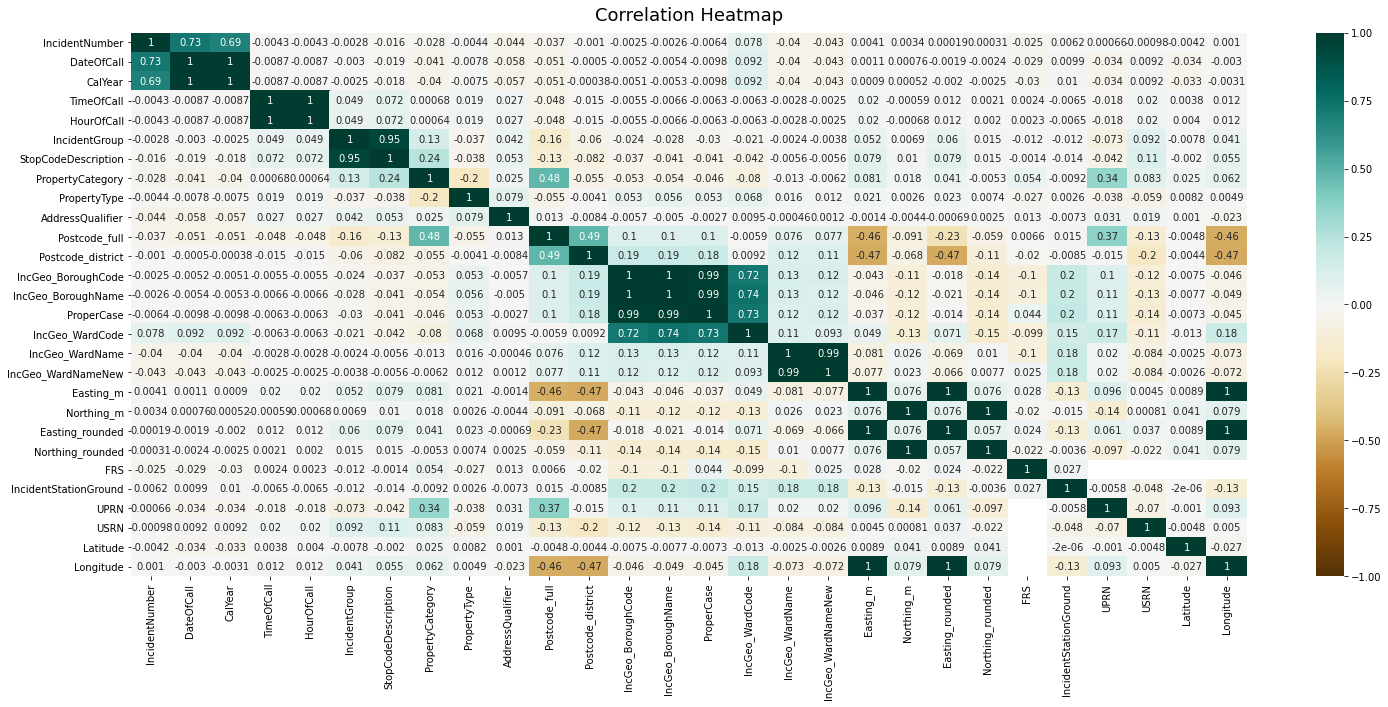

In [ ]:
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
#dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the lab

#VISUALIZACION DATOS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


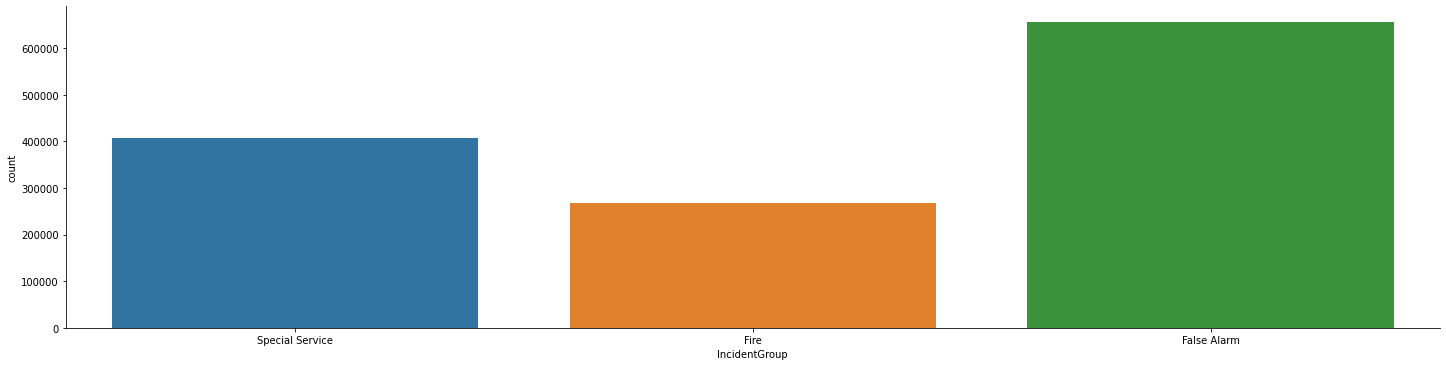

In [ ]:
sns.catplot('IncidentGroup',data=df,kind="count",aspect=4)

In [ ]:
#resetear indices
#df.set_index
df

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,UPRN,USRN,Latitude,Longitude,PumpCount,PumpHoursRoundUp,Notional Cost (£)
0,235138081,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,E09000032,WANDSWORTH,Wandsworth,E05000620,Queenstown,Queenstown,528652.0,176830.0,528650,176850,London,Battersea,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1091,2009-01-01,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,Open land/water - nearest gazetteer location,SE1 7SG,SE1,E09000022,LAMBETH,Lambeth,E05000416,Bishop's,Bishop's,530485.0,179007.0,530450,179050,London,Lambeth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2091,2009-01-01,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,E09000010,ENFIELD,Enfield,E05000201,Haselbury,Haselbury,533773.0,194492.0,533750,194450,London,Edmonton,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3091,2009-01-01,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,E09000017,HILLINGDON,Hillingdon,E05000332,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,London,Hillingdon,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5091,2009-01-01,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,E09000019,ISLINGTON,Islington,E05000375,Holloway,Holloway,531058.0,185307.0,531050,185350,London,Holloway,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333065,050590-30042021,2021-04-30,2021,21:42:23,21,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Within same building,NaN,NW6,E09000007,CAMDEN,Camden,E05000144,SWISS COTTAGE,SWISS COTTAGE,NaN,NaN,525650,184050,London,West Hampstead,NaN,NaN,NaN,NaN,1.0,1.0,0.000000e+00,20400412.0,NaN,NaN,1.0,1.0,352.0
1333066,050431-30042021,2021-04-30,2021,16:20:38,16,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,Correct incident location,SE8 5DD,SE8,E09000023,LEWISHAM,Lewisham,E05000443,EVELYN,EVELYN,536272.0,178387.0,536250,178350,London,Deptford,402.0,Old Kent Road,NaN,NaN,1.0,1.0,1.002533e+10,22004367.0,51.488022,-0.038628,1.0,1.0,352.0
1333067,050653-30042021,2021-04-30,2021,23:53:36,23,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,Nearby address - street not listed in gazetteer,E10 7AG,E10,E09000031,WALTHAM FOREST,Waltham Forest,E05000603,LEA BRIDGE,LEA BRIDGE,537667.0,187977.0,537650,187950,London,Leyton,244.0,Leyton,NaN,NaN,1.0,1.0,1.000236e+11,22832450.0,51.573868,-0.014799,1.0,1.0,352.0
1333068,050428-30042021,2021-04-30,2021,16:14:59,16,Fire,Secondary Fire,NaN,Outdoor Structure,Common external bin storage area,In street close to gazetteer location,SE13 7LX,SE13,E09000011,GREENWICH,Greenwich,E05000222,GREENWICH WEST,GREENWICH WEST,537885.0,176420.0,537850,176450,London,Greenwich,452.0,Greenwich,NaN,NaN,1.0,1.0,1.000210e+11,20801074.0,51.469960,-0.016181,1.0,1.0,352.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c9e28a690>,
      dtype=object)

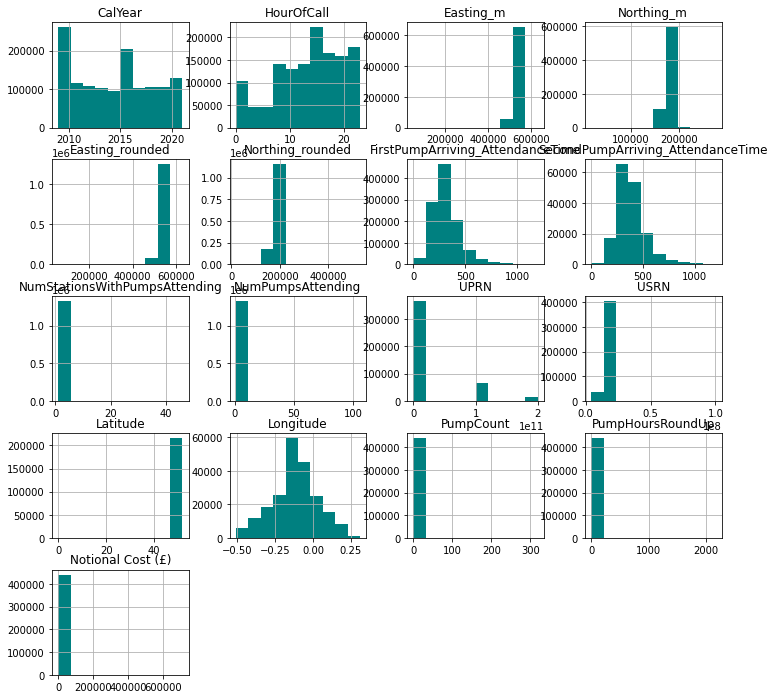

In [ ]:
df.hist(figsize=(12,12), color="#008080")